<h2 align="center">Numerical Integration</h2> 

It is often useful to be able to integrate functions numerically.  This is important if you don't have an analytic function at all (e.g. when you have tabulated datapoints from some experimental apparatus) or when you have a function, but it isn't one with an analytic solution to the integral.

## Background

There are several techniques for numerical integration.  Today we will consider two of them: the trapezoidal rule, and Simpson's rule. 

<b>Background reading \#1</b>  In Moodle, you will find a PDF document linked for today's lab.  This gives some background on different numerical integration methods.  Download <a href="https://moodle.swarthmore.edu/mod/resource/view.php?id=180055">the PDF document from Moodle</a>, and read the first two pages, on the trapezoidal method of integration.

<b>Exercise 1</b>  Choose a simple function (e.g. $\sin^2 x$, $e^{-x}$, etc.) that you can integrate analytically (with pencil and paper).  Write a function that takes a numpy array of $x$ values and returns an array with the corresponding $y$ values for your chosen function. Choose your $x$ values to be between bounds that are easy to integrate over.  Write a function that takes your $x$ and $y$ arrays as input, and uses the trapezoidal rule to return the value of the integral $\int_{a}^{b}\, f(x)\,dx$.  Print out the value of your integral, and calculate the percent error compared to the analytic solution. Make it clear in the comments to your code what your chosen function is, as well as its limits $a$ and $b$ and its analytic solution.

333.350338401


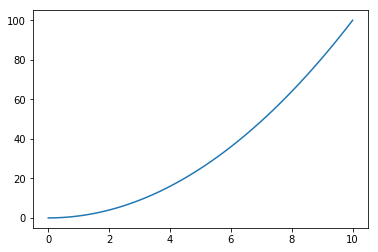

In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as  mp

def func(x):
    return x**2

x = np.linspace(0,10,100)
y = func(x)

h = x[1]-x[0]
I = h*(0.5*y[0]+0.5*y[-1]+sum(y[1:-1]))

print(I)
       
       
mp.plot(x,y)
mp.show()

<b>Exercise 2</b>  What step size $h$ (spacing between consecutive elements in $x$) do you need in order to the answer to your integral correct to within 1 part in 10,000?  Write a function to test your trapezoidal function above and return the step size $h$ needed for the integral to be correct within 1 part in 10,000.

In [9]:
len(y)

100

<b>Background reading \#2</b> Read pp. 3 and 4 in the background document linked above, on Simpson's rule for integration.

<b> Exercise 3</b>  Do the same thing as Exercise 1, but write a new function that implements Simpson's rule to do the integration.  Compare the accuracy of this estimate of the integral to that of your trapezoidal rule estimate when both use the same number of points. 

In [10]:
def simpSum(a):
    mysum = 0
    for k in range(1,len(a)-1):
        if k%2:
            mysum = mysum + 2*a[k]
        else:
            mysum = mysum + 4*a[k]
    return mysum

I2 = (1./3.)*h*(y[0]+y[-1]+simpSum(y))
print(I2)


def simpSum2(a):
    return sum(2*y[np.arange(1,len(y)-1,2)])+sum(4*y[np.arange(2,len(y)-1,2)])
I3 = (1./3.)*h*(y[0]+y[-1]+simpSum2(y))
print(I3)

333.333333333
333.333333333


One useful function in physics and astronomy is that for blackbody radiation.  It can be shown that the power emitted per unit area per wavelength interval $d\lambda$ of a body at temperature $T$ is given by the expression $$\pi B_\lambda =\frac{2\pi hc^2}{\lambda^5}\frac{1}{e^{hc/\lambda k T}-1}$$

This can be integrated analytically over the interval $[0, \infty]$, giving that the total power per unit area over all wavelengths is $\sigma T^4$ where $\sigma$ is the Stefan-Boltzmann constant given by $$\sigma = \frac{2 \pi^5 k^4}{15 c^2 h^3} = 5.67 \times 10^{-8}\ \frac{W}{m^2\,K^4}$$  

But there is no analytic solution over finite wavelength bounds - thus the integral has to be done numerically to find the power radiated in a particular wavelength band, such as the visible part of the electromagnetic spectrum. 


<b>Exercise 4</b> Write a function `Planck` that returns an array of values of the expression above, given an input array of wavelengths and a temperature $T$.  Be careful about the definitions of your constants, and appropriate conversion factors - choose units such that input wavelengths are in nanometers, and the output value is in $W/ m^2 / nm$. (That way when you integrate this later over a wavelength range in nm, you will get $W/m^2$ out.).  Also, for later exercises, you need wavelength to be the first argument of your `Planck` function.  Use your function to plot the Planck function from $400$ to $800 nm$ for a black body at $T=5000K$

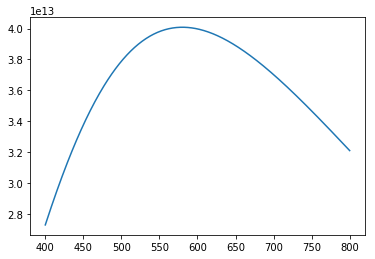

35363866.06535127


In [11]:
def Planck(l, T):
    k = 1.381E-23
    c = 3E8
    h = 6.63E-34
    return (2.*np.pi*h*c**2/(l*1E-9)**5) * 1./(np.e**(h*c/(l*1.0E-9*k*T))-1.)

wavelength = np.linspace(400,800,400)
radiation = Planck(wavelength, 5000)
mp.plot(wavelength, radiation)
mp.show()

k = 1.381E-23
c = 3E8
h = 6.63E-34

totalP = 2*np.pi**5*k**4/(15*c**2*h**3)*5000**4
print(totalP)

<b> Exercise 5</b> Use one of your integrating functions above to integrate the Planck function over the visible part of the spectrum, $\lambda$ = 400 to 800 nm.   Plot the fraction of total power that is emitted in the visible region as a function of $T$ from 300 K to 20000 K.

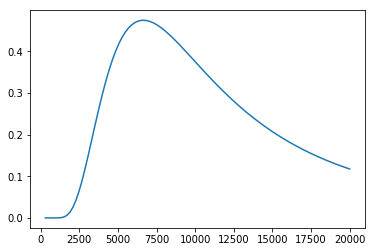

In [12]:
def simpSum(a):
    mysum = 0
    for k in range(1,len(a)-1):
        if k%2:
            mysum = mysum + 2*a[k]
        else:
            mysum = mysum + 4*a[k]
    return mysum

d=(wavelength[1]-wavelength[0])*1E-9
t = np.linspace(300,20000,100)
Pfrac = np.zeros(100)
for x in range(100):
    radiation = Planck(wavelength, t[x])
    visP = 1./3.*d*(radiation[0]+radiation[-1]+simpSum(radiation))
    totalP = 2*np.pi**5*k**4/(15*c**2*h**3)*t[x]**4    
    Pfrac[x] = visP/totalP

mp.plot(t,Pfrac)
mp.show()

The module Scipy contains a number of numerical integration methods.  Here's an example integrating $f(x) = x^2$ using the `scipy` method `quad`.  I've also used the `%timeit` feature of iPython to time the execution of this code.  Note also that it takes the *name* of a function as input, along with the bounds, rather than an array of values. 

In [13]:
import scipy.integrate as si

def myFunc(x):
    return x**2

(ans, err) = si.quad(myFunc, 0,5)
print("Answer is ", ans, " +/- ", err)

%timeit si.quad(myFunc, 0,5)


Answer is  41.66666666666666  +/-  4.625929269271485e-13
8.12 µs ± 95.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


**Exercise 6** Use the `quad` function to perform the Planck function integral that you did in Exercises 5.  Compare your earlier results to the result from this one.  Use the %timeit function to time your earlier functions and compare your results to the built-in function.  `quad` takes as argument your function name, the start and end points for the integral and any other arguments needed for the function - in the case of `Planck`, the other argument you must supply is temperature.

In [18]:
#x = np.linspace(0,10,10)
#print(x)
#y = x[np.arange(0,10,2)]
#print(y)

%timeit si.quad(Planck, 400, 800, 1000)
quadR = si.quad(Planck, 400, 800, 1000)
print(quadR)
x = np.linspace(400,800,100)
h = x[1] - x[0]
y = Planck(x, 1000)
%timeit simpSum(y)
simpR = simpSum(y)
print(( 1./3.)*h*(y[0]+y[-1]+simpSum2(y)))

23 µs ± 268 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
(915499914.7412062, 1.0164090843880549e-05)
43 µs ± 710 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
915499956.208
